# Tugas 1


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('data/voice.csv')

display(data.head())
display(data.shape)
display(data.info())
display(data.describe())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


(3168, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

None

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


### Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.



In [34]:
X = data.drop('label', axis=1)
y = data['label']

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

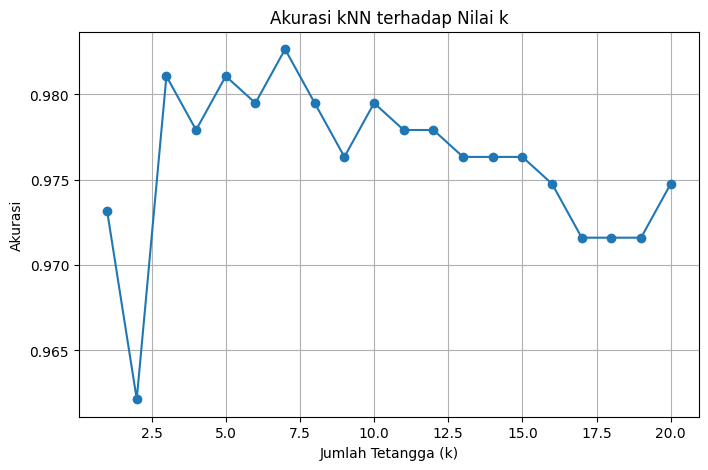

Nilai k terbaik: 7, Akurasi: 0.9826


In [35]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Akurasi kNN terhadap Nilai k')
plt.xlabel('Jumlah Tetangga (k)')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Nilai k terbaik
k_terbaik = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Nilai k terbaik: {k_terbaik}, Akurasi: {best_acc:.4f}")


In [36]:
best_knn = KNeighborsClassifier(n_neighbors=k_terbaik)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

# Evaluasi
print("\n=== Classification Report (k terbaik) ===")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))



=== Classification Report (k terbaik) ===
              precision    recall  f1-score   support

      female       0.99      0.98      0.98       297
        male       0.98      0.99      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?



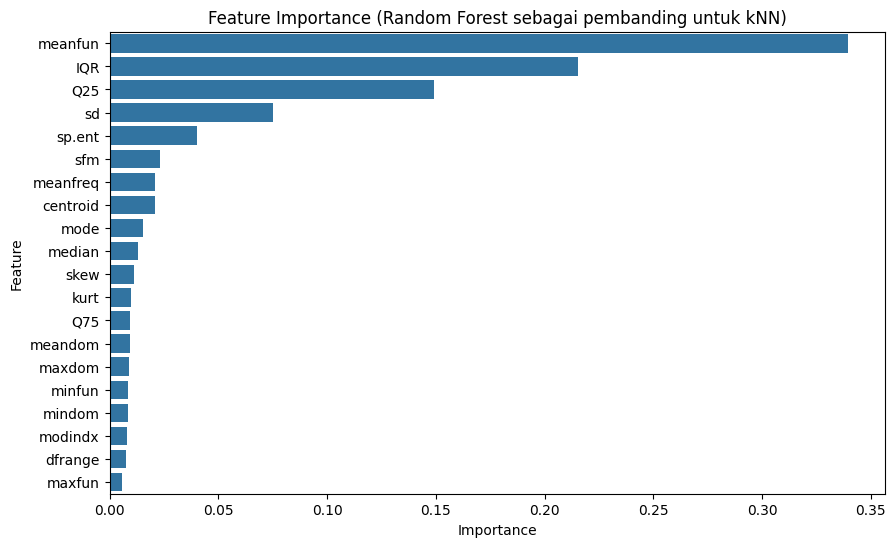

Fitur terbaik: ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'sfm', 'meanfreq', 'centroid', 'mode', 'median']


In [37]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.Series(rf.feature_importances_, index=data.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest sebagai pembanding untuk kNN)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Pilih fitur teratas
top_features = feature_importance.head(10).index
print("Fitur terbaik:", list(top_features))


In [38]:
X_selected = data[top_features]
X_selected_scaled = scaler.fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42
)

knn_best = KNeighborsClassifier(n_neighbors=k_terbaik)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

acc_selected = accuracy_score(y_test, y_pred)
print(f"Akurasi setelah memilih fitur optimal: {acc_selected:.4f}")


Akurasi setelah memilih fitur optimal: 0.9826


### Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

Berdasarkan hasil percobaan dan analisis grafik hubungan antara nilai k dan akurasi model k-Nearest Neighbors (kNN), diperoleh bahwa nilai k terbaik adalah 7 dengan akurasi tertinggi sebesar 0.9826 atau 98,26%. Pada nilai k yang terlalu kecil, model cenderung mengalami overfitting karena terlalu sensitif terhadap data latih, sedangkan pada nilai k yang terlalu besar, akurasi menurun akibat model menjadi terlalu umum (underfitting). Dengan nilai k = 7, model mencapai keseimbangan optimal antara bias dan varians, sehingga mampu mengklasifikasikan suara laki-laki dan perempuan dengan sangat baik. Fitur-fitur terbaik yang digunakan antara lain meanfun, IQR, Q25, sd, sp.ent, sfm, meanfreq, centroid, mode, dan median, yang menggambarkan karakteristik frekuensi dan spektrum suara. Fitur-fitur tersebut berperan penting karena mampu menangkap perbedaan pola harmonik dan spektral antara suara laki-laki dan perempuan, sehingga menghasilkan performa klasifikasi yang sangat akurat.